In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install dicom2nifti

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nilearn

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [59]:
root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/")

In [64]:

root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/")

In [65]:
def change_img_to_label_path(path):
    """
    Replaces imagesTr with labelsTr
    """
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "CTres"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object


In [66]:
list(root.parts)

['nifti',
 'FDG-PET-CT-Lesions',
 'PETCT_0011f3deaf',
 '03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445']

In [67]:
list(root.glob("CT*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz')]

In [68]:
list(root.glob("*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/PET.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SEG.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV.nii.gz')]

In [69]:
sample_path = list(root.glob("PET*"))[0]  # Choose a subject
sample_path_label = list(root.glob("SEG*"))[0]

In [70]:
data = nib.load(sample_path)
label = nib.load(sample_path_label)

ct = data.get_fdata()
mask = label.get_fdata().astype(int)  # Class labels should not be handled as float64

In [71]:
nib.aff2axcodes(data.affine)

('L', 'A', 'S')

<IPython.core.display.Javascript object>


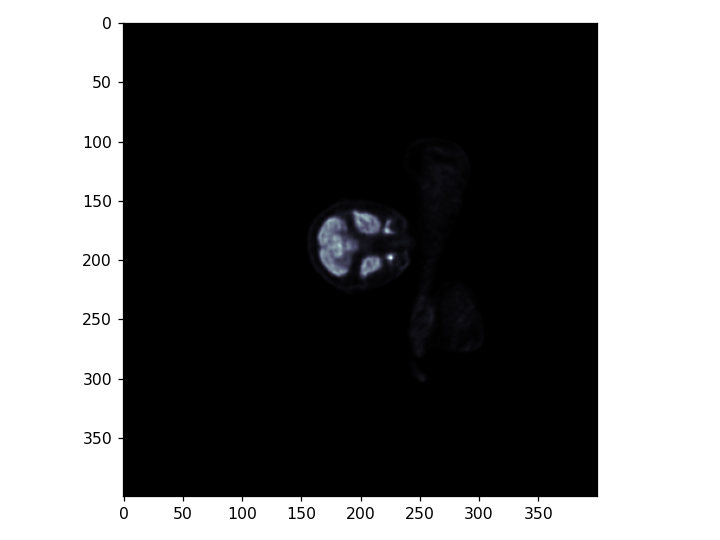

In [72]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(ct.shape[2]):  # Axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation

In [73]:
HTML(animation.to_html5_video())

C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
